In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#MNIST IMAGE --> Tensors

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [ ]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image,label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

5

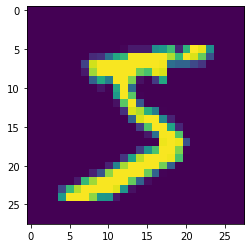

In [ ]:
plt.imshow(image.reshape((28,28)))  #viridis

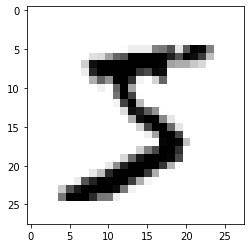

In [ ]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')#viridis

In [ ]:
torch.manual_seed(101)

#0 images, 1 images, ...
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle = False)

In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #Formatting

In [ ]:
#First Batch
for images, labels in train_loader:
  break

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([100])

In [ ]:
print('Labels: ', labels[:12].numpy()) # print the first 12 labels

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


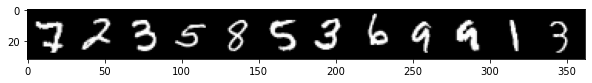

In [ ]:
# print the first 12 labels
print('Labels: ', labels[:12].numpy())

# print the first 12 images
im = make_grid(images[:12], nrow=12)  #the default nrow is 8
plt.figure(figsize=(10,4))

#We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(),(1,2,0)));